# Simulated Annealing in Traveling Salesman
Simulated annealing (SA) is a probabilistic technique for approximating the global optimum of a given function. Specifically, it is a metaheuristic to approximate global optimization in a large search space for an optimization problem. It is often used when the search space is discrete (for example the traveling salesman problem, the boolean satisfiability problem, protein structure prediction, and job-shop scheduling). For problems where finding an approximate global optimum is more important than finding a precise local optimum in a fixed amount of time, simulated annealing may be preferable to exact algorithms such as gradient descent or branch and bound.

In [119]:
#Import the library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

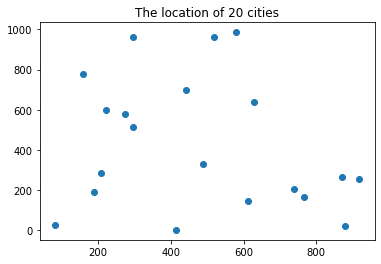

In [423]:
#Create data with 7 cities
np.random.seed(5)
n = 20
data = np.random.rand(2,n)*1000
plt.scatter(data[0], data[1])
plt.title('The location of {} cities'.format(n))
plt.show()

In [424]:
x_cord = data[0]
y_cord = data[1]

In [425]:
data_arr = [0]*n
for i in range(0,len(data_arr)):
    sub_list = [0]*2
    sub_list[0] = x_cord[i]
    sub_list[1] = y_cord[i]
    data_arr[i] = sub_list
data_arr = np.array(data_arr)

In [426]:
#Calculate the distance matrix 
def distance_cal(data):
    dis_matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            dis = np.sqrt((data[i,0] - data[j,0])**2 + (data[i,1] - data[j,1])**2)
            dis_matrix[i,j] = dis
            dis_matrix[j,i] = dis
    return dis_matrix

In [427]:
distance = distance_cal(data_arr)
distance_data = pd.DataFrame(distance, index = np.arange(0,n), columns = np.arange(0,n))

In [428]:
#This function is to calculate the distance of a route
def dis_cal(lst):
    distance_value = [0]*len(lst)
    for i in range(len(lst)-1):
        distance_value[i] = distance[lst[i], lst[i+1]]
    distance_value[-1] = distance[lst[0], lst[-1]]
    len_route = sum(distance_value)
    return len_route

In [429]:
#Initial solution
x0 = list(range(n))
#Caluclate the objective function
len_x0 = dis_cal(x0)
print('Length of initial solution: ', len_x0)

Length of initial solution:  10723.749395852592


In [430]:
#Set parameter of SA algorithm
T0 = 3000 #Starting temperature
M = 2000 #Number of algorithm iterations
N = 50 #Number of accept interation
alpha = 0.995

In [431]:
#This function is to swap two element in list based on their index and create a new list
def swap(lst, index1, index2):
    new_lst = []
    for i in range(len(lst)):
        if i == index1:
            new_lst.append(lst[index2])
        elif i == index2:
            new_lst.append(lst[index1])
        else:
            new_lst.append(lst[i])
    return new_lst

In [432]:
#This list is to save the parameter for visualization
temp = []
optimum_len = []
iterations = list(range(0,M))

In [433]:
for i in range(M): 
    for j in range(N):
        #Generate random integers in order to swap cities
        rand1 = np.random.randint(0,len(x0))
        rand2 = np.random.randint(0,len(x0))
        while rand1 == rand2:
            rand2 = np.random.randint(0,len(x0))
        #swap the nodes to create candidate solution
        xtemp = swap(x0,rand1,rand2)
        #Calculate the route length of current solution x0
        len_x0 = dis_cal(x0)
        #Calculate the route length of xtemp
        len_xtemp = dis_cal(xtemp)
        #Calculate the acceptance probability
        p_accept = np.exp((len_x0 - len_xtemp)/T0)
        #Generate a random number to accept move
        R = np.random.rand()
        if len_xtemp <= len_x0:
            x0 = xtemp
        elif R <= p_accept:
            x0 = xtemp
        else:
            x0 = x0
    temp.append(T0)
    optimum_len.append(len_xtemp)
    T0 = alpha*T0

In [434]:
#Extract the coordinate of x0
x_x0 = [0]*(len(x0)+1)
y_x0 = [0]*(len(x0)+1)
for i in range(len(x0)):
    x_x0[i] = data_arr[x0[i],0]
    y_x0[i] = data_arr[x0[i],1]
    x_x0[-1] = data_arr[x0[0],0]
    y_x0[-1] = data_arr[x0[0],1]

Final solution is: [8, 7, 19, 4, 2, 9, 10, 16, 5, 11, 6, 14, 3, 1, 18, 12, 17, 15, 0, 13]
Objective value is: 4179.715484263754


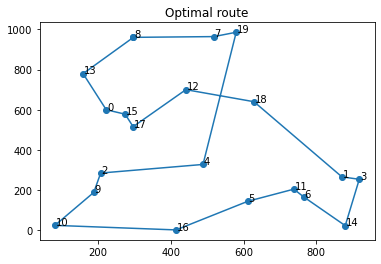

In [435]:
#This cell is to visualize the result
print('Final solution is:', x0)
print('Objective value is:', len_x0)
#Print the final route 
plt.plot(x_x0, y_x0, linestyle = 'solid', marker = 'o')
plt.title('Optimal route')
for i in range(len(x0)):
    plt.text(x_x0[i] + 2, y_x0[i],str(x0[i]))
plt.show()

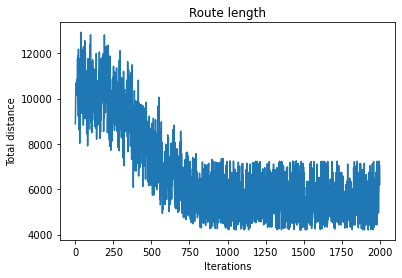

In [436]:
#Print the optimum route
plt.plot(iterations, optimum_len)
plt.title('Route length')
plt.xlabel('Iterations')
plt.ylabel('Total distance')
plt.show()

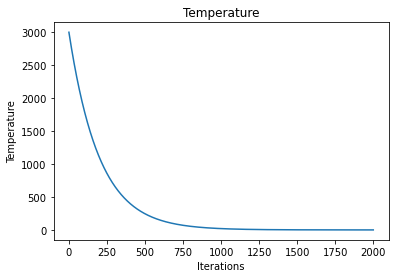

In [437]:
#Print the temperature
plt.plot(iterations, temp)
plt.title('Temperature')
plt.xlabel('Iterations')
plt.ylabel('Temperature')
plt.show()